In [1]:
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
img = Image.open("C:\\Users\\AJAY\\Desktop\\dt.jpg")
img_np = np.asarray(img)
img_np[0:2]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],


In [3]:
img_np.shape

(122, 163, 3)

In [4]:
pixels = img_np.reshape(img_np.shape[0]*img_np.shape[1],img_np.shape[2])
pixels.shape

(19886, 3)

In [7]:
model = KMeans(n_clusters = 12)
model.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
pixel_centroids = model.labels_
cluster_centers = model.cluster_centers_
pixel_centroids

array([3, 3, 3, ..., 3, 3, 3])

In [9]:
cluster_centers

array([[  3.1486631 ,   2.42673797,  10.01069519],
       [242.90854271, 237.95376884, 234.05929648],
       [186.87053217, 126.89912629,  98.29070691],
       [254.26643599, 254.31304702, 253.85782618],
       [115.21311475,  69.58360656,  49.33934426],
       [154.68592058, 143.36101083, 139.54512635],
       [ 23.07570353,  20.92667459,  32.34879112],
       [ 84.6497006 , 111.55988024, 186.09580838],
       [ 64.37012987,  72.03246753, 107.99350649],
       [152.27375353, 101.80620884,  76.2812794 ],
       [209.7424    , 158.7904    , 133.1488    ],
       [210.43142857, 201.28285714, 198.33142857]])

In [10]:
final = np.zeros((pixel_centroids.shape[0],3))
final.shape

(19886, 3)

In [12]:
for cluster_no in range(12):
    final[pixel_centroids == cluster_no] = cluster_centers[cluster_no]
final[0:5]

array([[254.26643599, 254.31304702, 253.85782618],
       [254.26643599, 254.31304702, 253.85782618],
       [254.26643599, 254.31304702, 253.85782618],
       [254.26643599, 254.31304702, 253.85782618],
       [254.26643599, 254.31304702, 253.85782618]])

In [14]:
comp_image = final.reshape(img_np.shape[0], img_np.shape[1],3)
comp_image.shape

(122, 163, 3)

In [16]:
comp_image = Image.fromarray(np.uint8(comp_image))
comp_image.save('dt_compressed.jpg')

In [17]:
img1 = mpimg.imread("C:\\Users\\AJAY\\Desktop\\dt.jpg")
img2 = mpimg.imread('dt_compressed.jpg')

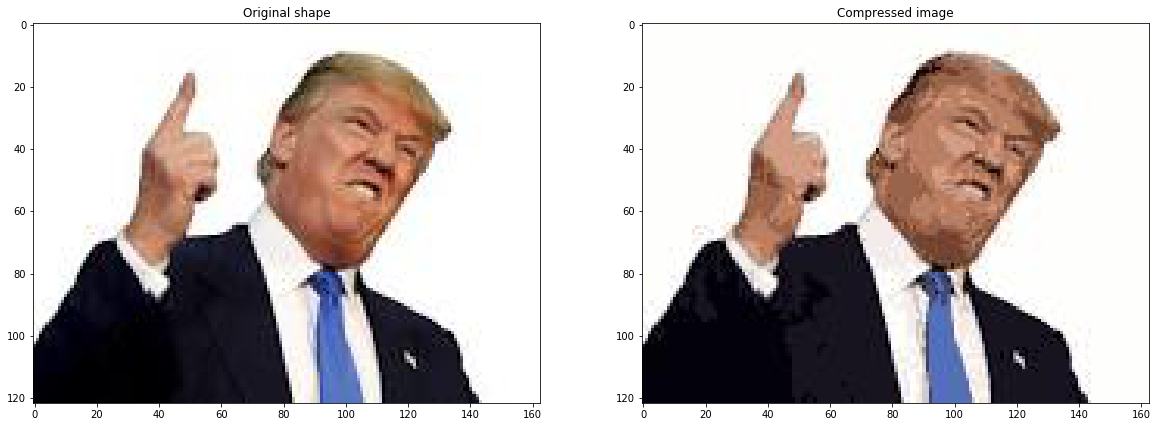

In [19]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (20,20))
ax1.imshow(img1)
ax1.set_title('Original shape')
ax2.imshow(img2)
ax2.set_title('Compressed image')
plt.show()

In [20]:
print('Size of original image:', int(os.stat("C:\\Users\\AJAY\\Desktop\\dt.jpg").st_size/1024),'KB')
print('Size of Compressed Image', int(os.stat("dt_compressed.jpg").st_size/1024),'KB')

Size of original image: 3 KB
Size of Compressed Image 3 KB
